# Data Discovery & Cleaning

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import datetime as dt

In [172]:
warnings.filterwarnings('ignore')
color = sns.color_palette()

In [173]:
df=pd.read_excel("Online Retail.xlsx")

In [174]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [175]:
# Let's discover the shape of our dataset
df.shape

(541909, 8)

In [176]:
# getting general infos about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [177]:
#last date available in our dataset
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [178]:
#First date available in our dataset
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [179]:
# Number of Null values in each column
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [180]:
#create a new dataframe without null values
df_new = df.dropna()

In [181]:
#checking the dataframe has no nan
df_new.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [182]:
# change the type column for CustomerID from float64 to int64
df_new['CustomerID'] = df_new['CustomerID'].astype('int64')

In [183]:
#Descrive the numercal columns
df_new.describe().round(3)

,Quantity,UnitPrice,CustomerID
count,406829.000,406829.000,406829.000
mean,12.061,3.460,15287.691
std,248.693,69.315,1713.600
min,-80995.000,0.000,12346.000
25%,2.000,1.250,13953.000
50%,5.000,1.950,15152.000
75%,12.000,3.750,16791.000
max,80995.000,38970.000,18287.000


In [184]:
# eliminate the rows with negative quantities
df_new = df_new[df_new.Quantity > 0]

In [185]:
# devide the date column into month and day and hour for further analysis
df_new.insert(loc=2, column='year_month', value=df_new['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.InvoiceDate.dt.month)
df_new.insert(loc=4, column='day', value=(df_new.InvoiceDate.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.InvoiceDate.dt.hour)

In [186]:
# create a new column amount_spent
df_new['amount_spent'] = df_new['Quantity'] * df_new['UnitPrice']

In [187]:
df_new.head(10)

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,201012,12,3,8,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,201012,12,3,8,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,201012,12,3,8,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,201012,12,3,8,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,84879,201012,12,3,8,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


In [188]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# Exploratory Data Analysis

In [189]:
#number of orders made by the customers
df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


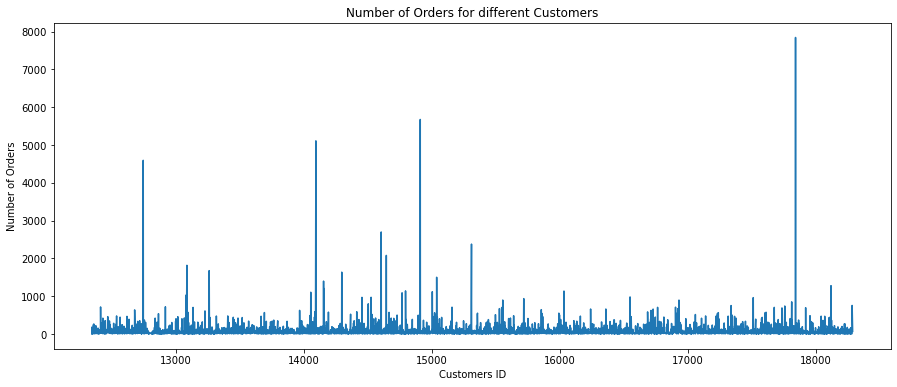

In [190]:
orders = df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [191]:
#top 10 most number of orders 
orders.sort_values(by='InvoiceNo', ascending=False).head(10)

,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
2185,15311,United Kingdom,2379
1698,14646,Netherlands,2080
570,13089,United Kingdom,1818
699,13263,United Kingdom,1677
1443,14298,United Kingdom,1637


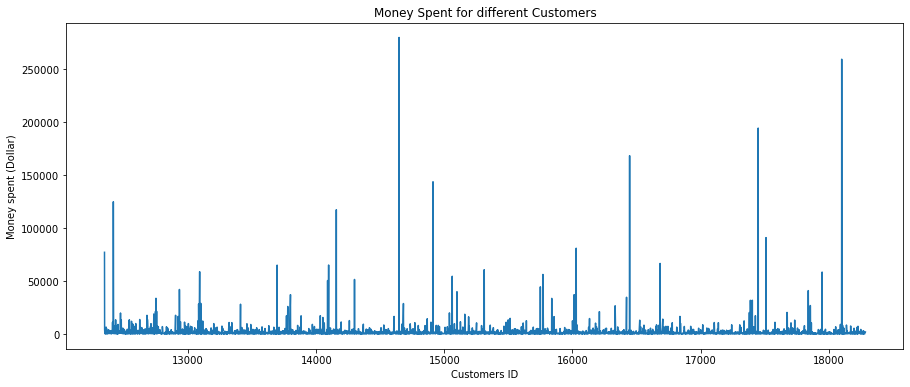

In [192]:
# money spent by the customers
money_spent = df_new.groupby(by=['CustomerID','Country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [193]:
#top 10 highest money spent
money_spent.sort_values(by='amount_spent', ascending=False).head(10)

,CustomerID,Country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


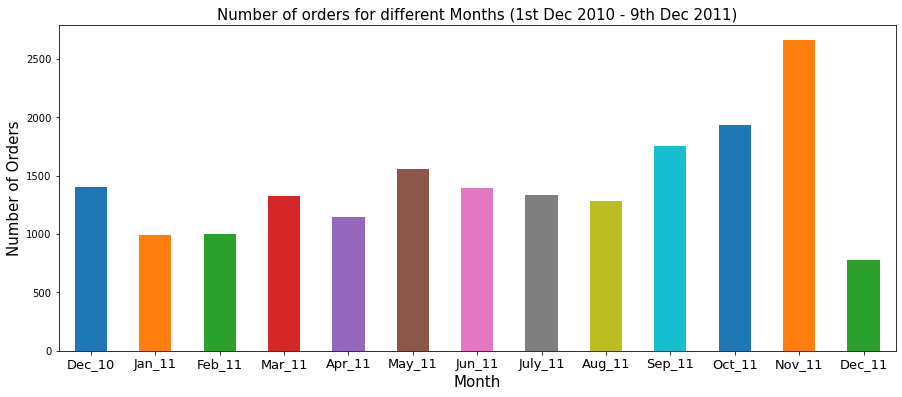

In [194]:
# number of orders for different months
ax = df_new.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color,figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

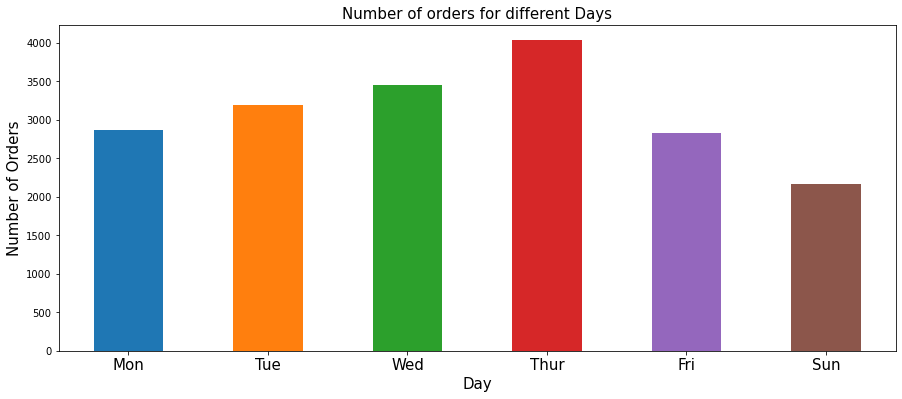

In [195]:
# number of orders for different days

ax = df_new.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar',color=color,figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

In [196]:
df_new.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

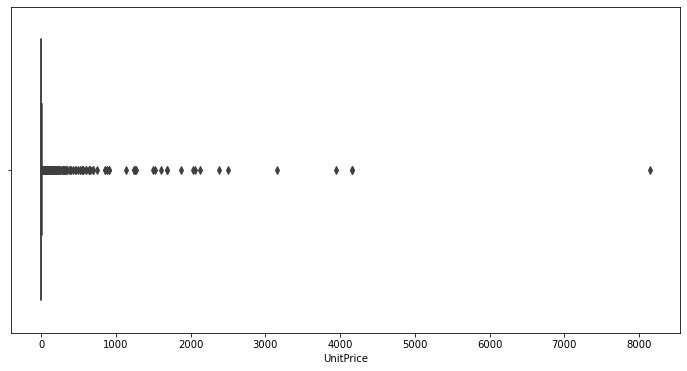

In [197]:
# check the distribution of unit price

plt.subplots(figsize=(12,6))
sns.boxplot(df_new.UnitPrice)
plt.show()

# RFM (Recency Frequency Monetary) Analysis

In [ ]:
# Category 0 : Silver Customer
# Category 1 : Platinum Custumer
# Category 2 : Gold Customer

In [198]:
now = dt.date(2011,12,9)

In [199]:
df_new['date'] = pd.DatetimeIndex(df_new.InvoiceDate).date

In [200]:
# group by customer by last date they purchased...

recency_df = df_new.groupby(['CustomerID'],as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346,2011-01-18
1,12347,2011-12-07
2,12348,2011-09-25
3,12349,2011-11-21
4,12350,2011-02-02


In [201]:
# calculate the recency
recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346,2011-01-18,325
1,12347,2011-12-07,2
2,12348,2011-09-25,75
3,12349,2011-11-21,18
4,12350,2011-02-02,310


In [202]:
recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

In [203]:
# calculate the frequency
frequency_df = df_new.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [204]:
# Calculate the Monetary

#calculate how much a customer spend in the each transaction...
df_new['Total_cost'] = df_new['UnitPrice'] * df_new['Quantity']
#check summed up spend of a customer with respect to latest date..

monetary_df=df_new.groupby('CustomerID',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [205]:
#Combine all together all dataframe in so we have recency, frequency and monetary values together..


rf = recency_df.merge(frequency_df,left_on='CustomerID',right_on='CustomerID')

rfm = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID')

rfm.set_index('CustomerID',inplace=True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40


In [206]:
#bring all the quartile value in a single dataframe
rfm_segmentation = rfm.copy()

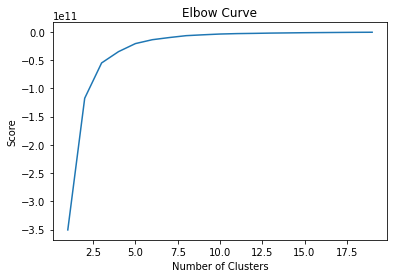

In [207]:
from sklearn.cluster import KMeans
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [282]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)


In [283]:
rfm_segmentation['cluster'] = kmeans.labels_

In [284]:
rfm_segmentation['cluster'].value_counts()

0    4308
2      26
1       5
Name: cluster, dtype: int64

In [290]:
rfm_segmentation.head(10)


,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12346,325,1,77183.60,2
12347,2,7,4310.00,0
12348,75,4,1797.24,0
12349,18,1,1757.55,0
12350,310,1,334.40,0
12352,36,8,2506.04,0
12353,204,1,89.00,0
12354,232,1,1079.40,0
12355,214,1,459.40,0


<AxesSubplot:xlabel='cluster', ylabel='Recency'>

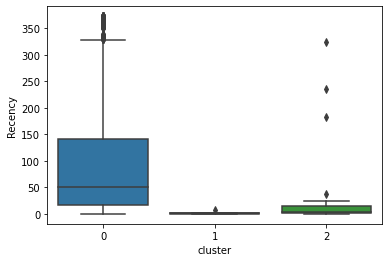

In [287]:
'''
cluster 0 have high recency rate which is bad. cluster 1 and cluster 2 having low so they are in race of platinum
and gold customer.
'''
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Recency)

<AxesSubplot:xlabel='cluster', ylabel='Frequency'>

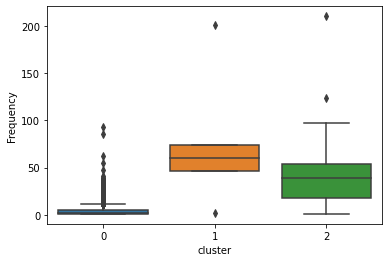

In [288]:
'''
cluster 0 have low frequency rate which is bad. cluster 1 and cluster 2 having high so they are in 
race of platinum and gold customer.
'''
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Frequency)

<AxesSubplot:xlabel='cluster', ylabel='Monetary'>

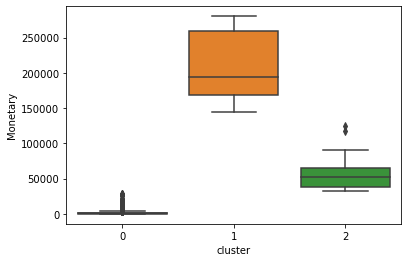

In [289]:
'''
cluster 0 have low Monetary rate which is bad. cluster 1 have highest Montary (money spend) platinum where as 
cluster 2 have medium level(Gold) and cluster 0 is silver customer.
'''

sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Monetary)

# Models

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [292]:
target = rfm_segmentation["cluster"]
rfm_segmentation.drop("cluster",axis=1,inplace=True)

In [293]:
trainset, testset, ytrain,ytest = train_test_split(rfm_segmentation,target, test_size=0.2, random_state=0)

In [294]:
trainset.shape

(3471, 3)

In [295]:
testset.shape

(868, 3)

In [296]:
ytrain.shape

(3471,)

In [297]:
ytest.shape

(868,)

In [298]:
ytrain

CustomerID
12546    0
17076    0
14597    0
15325    0
13113    0
        ..
13741    0
16793    0
14592    0
15889    0
16072    0
Name: cluster, Length: 3471, dtype: int32

## Logistic Regression

In [299]:
from sklearn.linear_model import LogisticRegression

LR_classification = LogisticRegression()
LR_classification.fit(trainset,ytrain)
Predictions = LR_classification.predict(trainset)
test_pred = LR_classification.predict(testset)

In [300]:
Predictions=Predictions.reshape(-1,1)
test_pred=test_pred.reshape(-1,1)

In [301]:
print("the accuracy of the model in train set: {:.2f}%".format(LR_classification.score(trainset,ytrain)*100))

the accuracy of the model in train set: 99.71%


In [302]:
print("the accuracy of the model in test set: {:.2f}%".format(LR_classification.score(testset,ytest)*100))

the accuracy of the model in test set: 99.77%


In [303]:
print(confusion_matrix(ytest, test_pred))
print(classification_report(ytest, test_pred))

[[860   0   0]
 [  0   0   0]
 [  1   1   6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       0.00      0.00      0.00         0
           2       1.00      0.75      0.86         8

    accuracy                           1.00       868
   macro avg       0.67      0.58      0.62       868
weighted avg       1.00      1.00      1.00       868



In [ ]:
# the same process can be implies on DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, SVC and KNeighborsClassifier
# the problem of these algorithms resides in the inbalanced categories of the clustering (most of categories are 0)
# the algorithms tends to classify most of the customers as class 0

In [315]:
LR_classification.predict(np.array([[1,15,100000]]))

array([1])

## Save the model to serve in the Streamlit app

In [313]:
!pip install joblib 
import joblib
joblib.dump(LR_classification, 'CustomerFidelityModel.pkl')  # Replace 'your_model.pkl' with the desired filename

['CustomerFidelityModel.pkl']